# Preprocessing test images

**Used MTCNN library to easily create face's bounding boxes.**

In [ ]:
pip install mtcnn

     |████████████████████████████████| 2.3MB 28.9MB/s 


In [ ]:
def draw_facebox(image, boxes):
    # plot the image
    plt.imshow(image)
    # get the axis for drawing boxes
    axis = plt.gca()
    # plot each box
    for box in boxes:
    # get coordinates
        x, y, width, height = box[0], box[1], box[2], box[3],
        # create the shape
        rect = plt.Rectangle((x, y), width, height, 
                             fill=False, color='r', linewidth=1)
        # draw the box
        axis.add_patch(rect)
    # show the plot
    plt.show()

**Plot a random image from with bounding box(es)**

[[404, 190, 307, 390]]


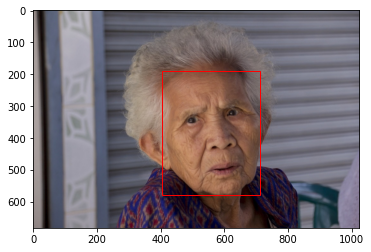

In [ ]:
from mtcnn.mtcnn import MTCNN
detector = MTCNN()

i = np.random.choice(len(test_images))
# load image from file
df = pd.DataFrame( data=np.ones([4,4]) )
image = plt.imread(os.path.join(img_dir, test_images[i]))
# detect faces in the image
faces = detector.detect_faces(image)
boxes = [face['box'] for face in faces if face['confidence']>0.99]
print(boxes)
# display faces on the original image
draw_facebox(image, boxes)

In [ ]:
# create lists which would contain filenames of images and bounding boxes
names = []
bboxes = []
for img_name in test_images:
    # load image from file
    image = plt.imread(os.path.join(img_dir, img_name))
    # detect faces in the image
    faces = detector.detect_faces(image)
    for face in faces: 
        if face['confidence']>0.99:
            names.append(img_name)
            bboxes.append(face['box'])

df = pd.DataFrame({'name' : names, 'bounding_box' : bboxes})
df.head()

In [ ]:
data=[]
for i in range(len(df)):
    # replace any negative value with zero
    x,y,width,height = [0 if value < 0 else value for value in df.iloc[i]['bounding_box']]
    image = df.iloc[i]['name']
    # read image with green channel
    img_array = cv2.imread(os.path.join(img_dir,image), 1)
    # crop image with bounding box
    img_cropped = img_array[y:y+height,x:x+width]  
    # resize cropped image
    img = cv2.resize(img_cropped,(img_size,img_size))
    data.append(img)

# Predict classes

In [ ]:
# Normalising the data before feeding into the model
X = np.array(data)/255
predict = model.predict(X)
df['classname'] = ['face_with_mask' if i > 0.8 else 'face_with_no_mask' for i in predict]
df

,name,bounding_box,classname
0,1800.jpg,"[956, 460, 246, 326]",face_with_no_mask
1,1796.jpg,"[933, 207, 232, 298]",face_with_mask
2,1796.jpg,"[728, 177, 84, 107]",face_with_no_mask
3,1796.jpg,"[469, 223, 186, 229]",face_with_mask
4,1795.jpg,"[688, 4, 40, 47]",face_with_no_mask
...,...,...,...
1960,0011.jpg,"[204, 72, 65, 85]",face_with_no_mask
1961,0011.jpg,"[406, 106, 70, 97]",face_with_no_mask
1962,0006.jpg,"[441, 668, 57, 70]",face_with_no_mask
1963,0004.jpg,"[630, 176, 212, 266]",face_with_mask


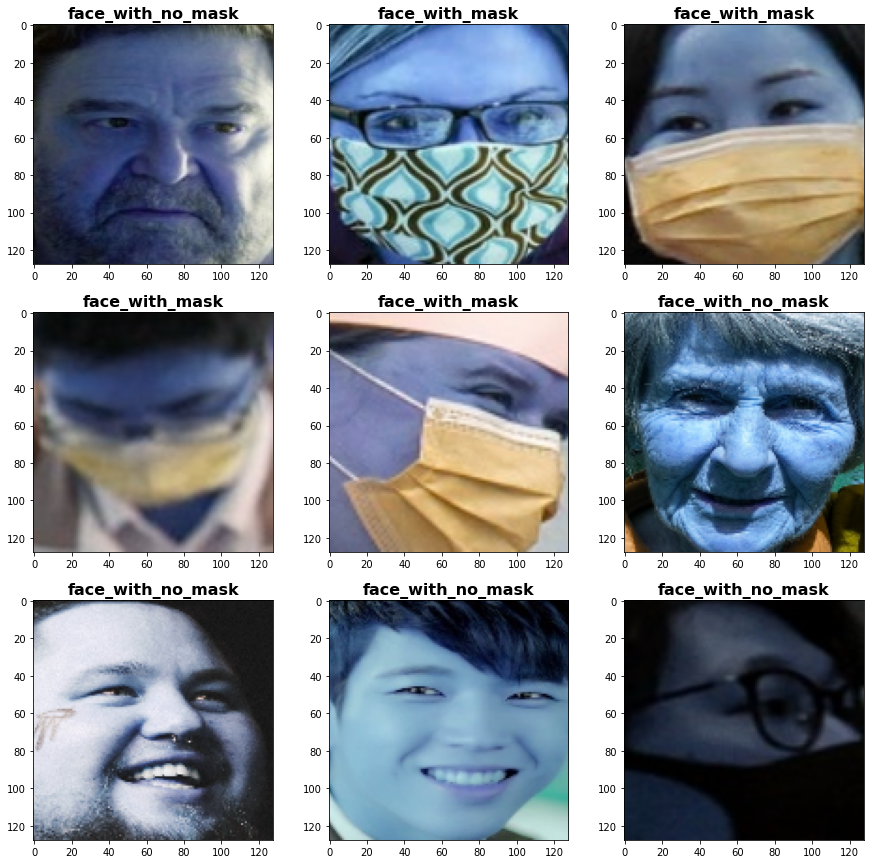

In [ ]:
# choose 9 random indixes from df.index
indexes = np.random.choice(df.index, 9)

fig, axes = plt.subplots(nrows=3, ncols=3) 
i = 0
fig.set_figheight(15)
fig.set_figwidth(15)
for row in axes:
    for col in row:
        # plot the cropped image
        col.imshow(data[indexes[i]])
        col.set_title(df.iloc[indexes[i]]['classname'],fontsize=16,fontweight='bold' )
        i+=1
plt.show()